In [ ]:
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# internal packages src/
from utils.load_and_preprocess import load_and_preprocess, missing_data, create_features, split_train_test
from models.randomforestmodel import train_model, predict
from utils.plot import plot_method1, plot_method2, plot_method3


### Before training, your data must be:
1. Numerical (no strings in features, also uint type is not desirable)
2. No NaNs
3. Sorted by Date (especially for lag features)

Ensuring it with missing_data() function

In [2]:
merged_df = load_and_preprocess('../data/sell_data_cleaned.csv', '../data/marketing_campaign.csv', '../data/stock.csv')
missing_data(merged_df)

,Total,Percent,Types
ID,0,0.0,int64
Product,0,0.0,object
Date,0,0.0,datetime64[ns]
Quantity,0,0.0,float64
Country,0,0.0,object
CountryStatus,0,0.0,object
ProductStatus,0,0.0,object
Stock,0,0.0,float64
ActiveCampaign,0,0.0,float64


### Included features:

1. Lag feature( 'StockLag1', 'StockLag7' with lag of 1 and 7 days respectively.)

    - Capture the stock level of a product from previous days.
    - Useful to predict current demand based on past availability

2. Moving Averages (StockMA7, StockMA14)

    - Creates a binary trend feature for modeling, can be used like:

        >If StockMA7 > StockMA14: Short-term stock increase.
        
        >If StockMA7 < StockMA14: Potential downward trend.

In [3]:
featured_df = create_features(merged_df)
missing_data(featured_df)

,Total,Percent,Types
ID,0,0.0,int64
Product,0,0.0,object
Date,0,0.0,datetime64[ns]
Quantity,0,0.0,float64
Country,0,0.0,object
CountryStatus,0,0.0,int64
ProductStatus,0,0.0,int64
Stock,0,0.0,float64
ActiveCampaign,0,0.0,float64
Year,0,0.0,int32


In [4]:
train_df, test_df, cutoff_date = split_train_test(featured_df)
train_df.head()

features = [
    'Year', 'Month', 'Week', 'DayOfWeek', 'DayOfMonth',
    'CountryEncoded', 'ProductEncoded', 'CountryStatus', 'ProductStatus',
    'ActiveCampaign', 'Stock', 'StockLag1', 'StockLag7', 'StockMA7', 'StockMA14'
]

print(train_df.columns.tolist())
model = train_model(train_df, features)


['ID', 'Product', 'Date', 'Quantity', 'Country', 'CountryStatus', 'ProductStatus', 'Stock', 'ActiveCampaign', 'Year', 'Month', 'Week', 'DayOfWeek', 'DayOfMonth', 'StockLag1', 'StockLag7', 'StockMA7', 'StockMA14', 'StatusCombination', 'CountryEncoded', 'ProductEncoded']


In [5]:
test_df = predict(model, test_df, features)

rmse = np.sqrt(mean_squared_error(test_df['Quantity'], test_df['Predicted']))
mae = mean_absolute_error(test_df['Quantity'], test_df['Predicted'])
print(f'RMSE: {rmse:.2f}, MAE: {mae:.2f}')

RMSE: 25.18, MAE: 7.31


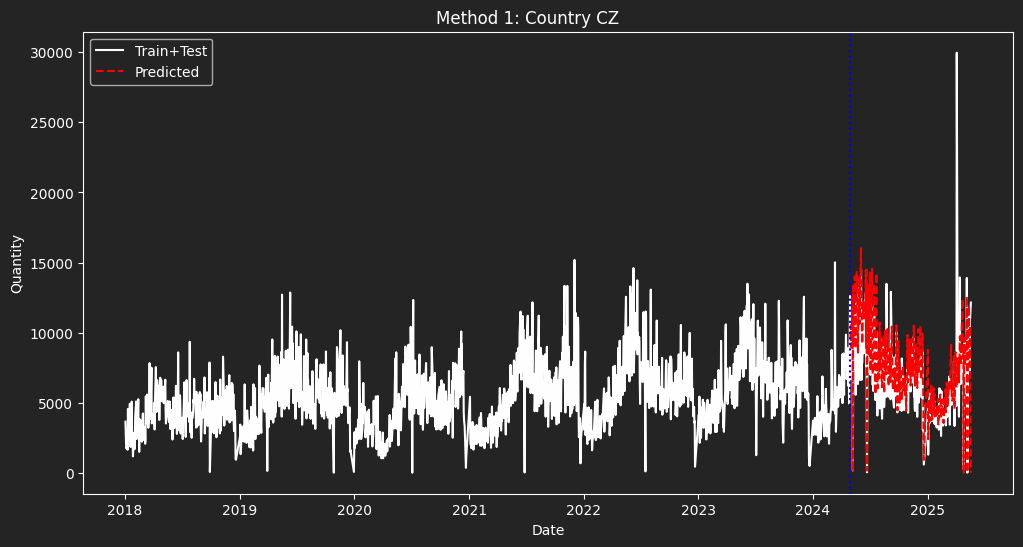

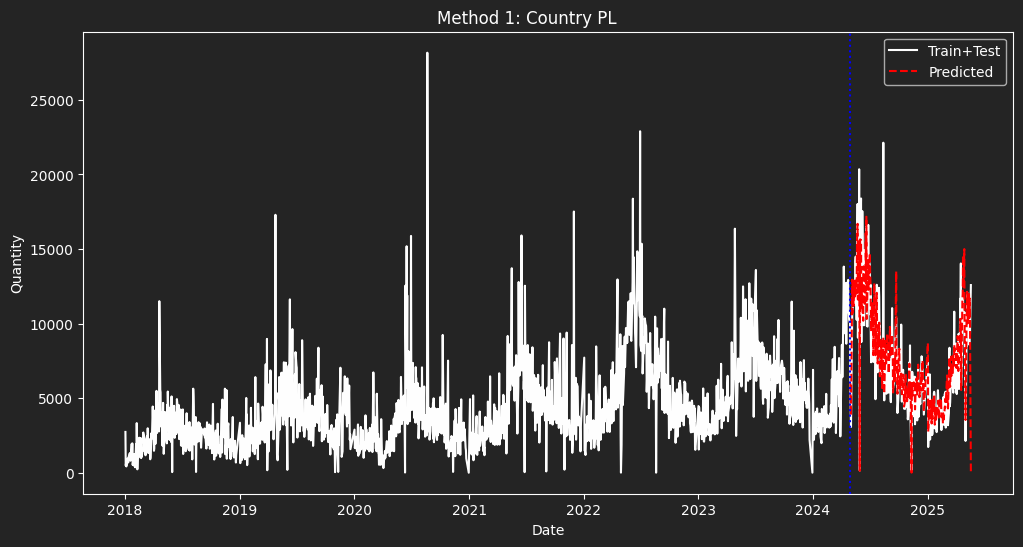

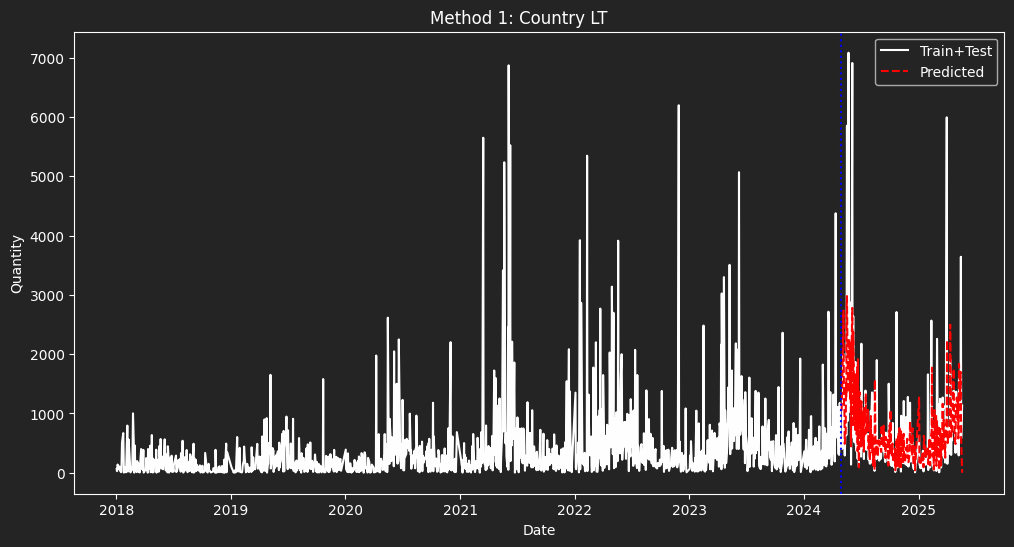

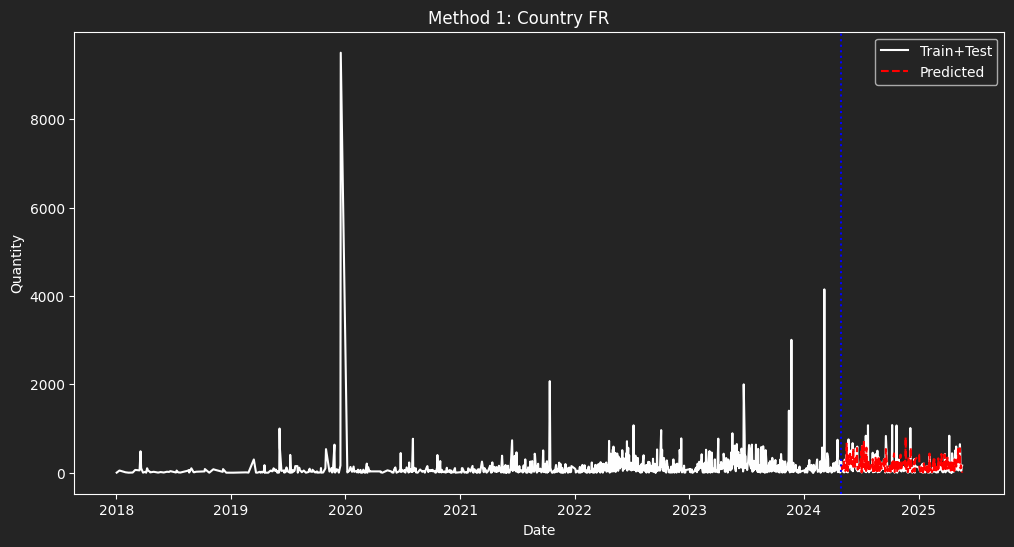

In [6]:
plot_method1(train_df, test_df, cutoff_date)

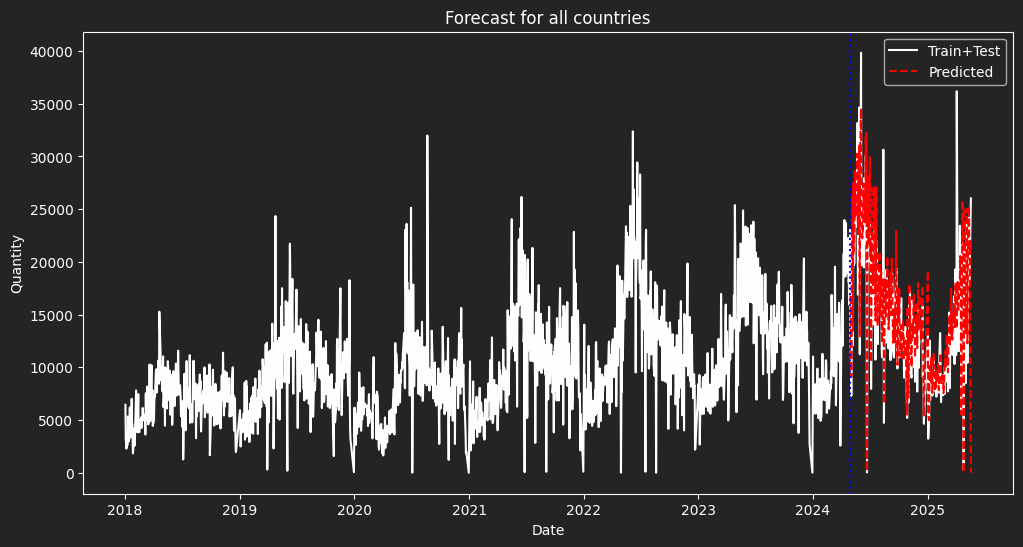

In [7]:

plot_method2(train_df, test_df, cutoff_date)

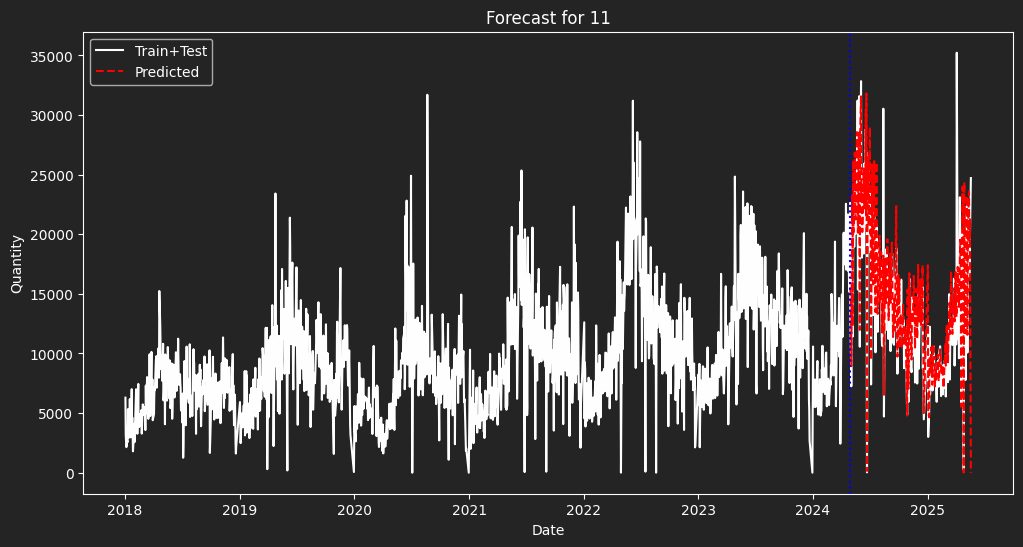

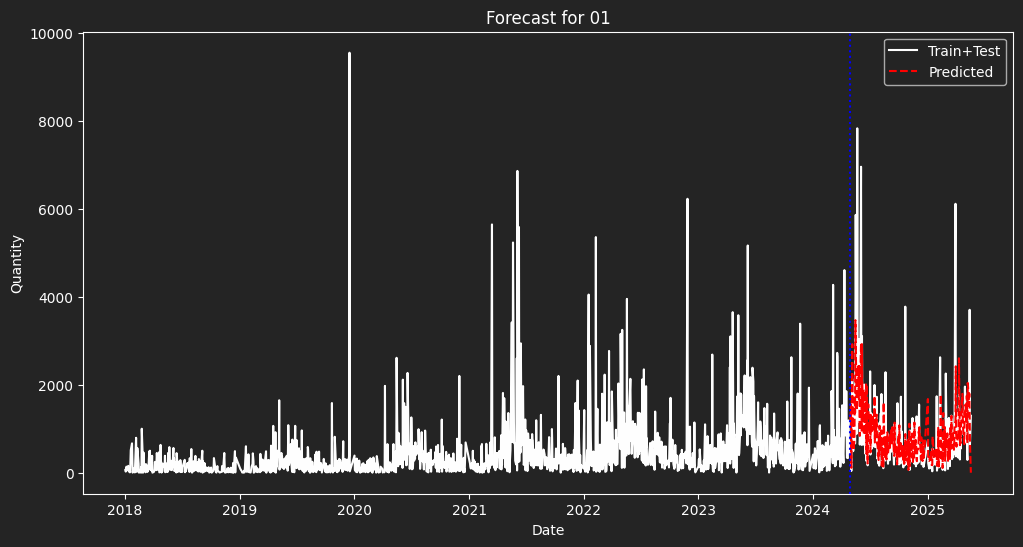

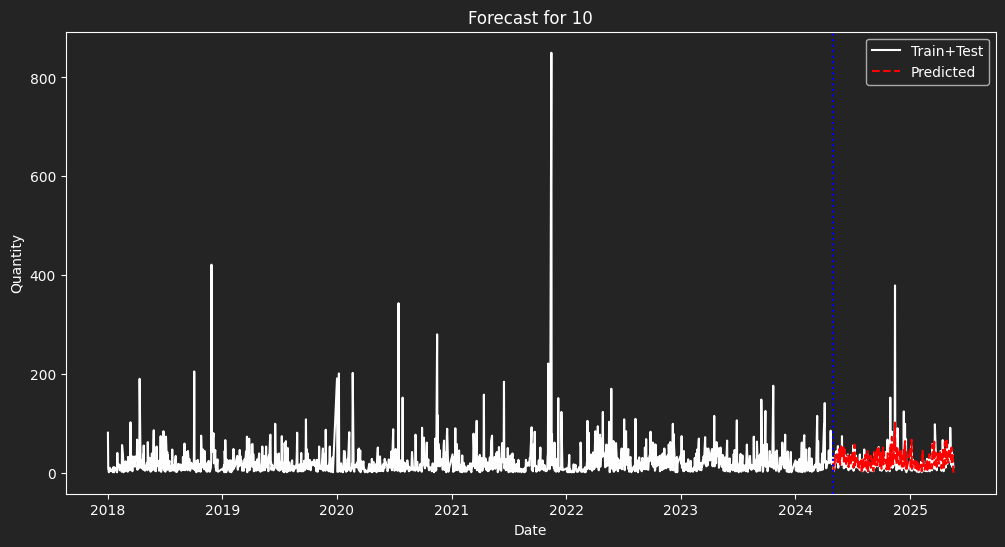

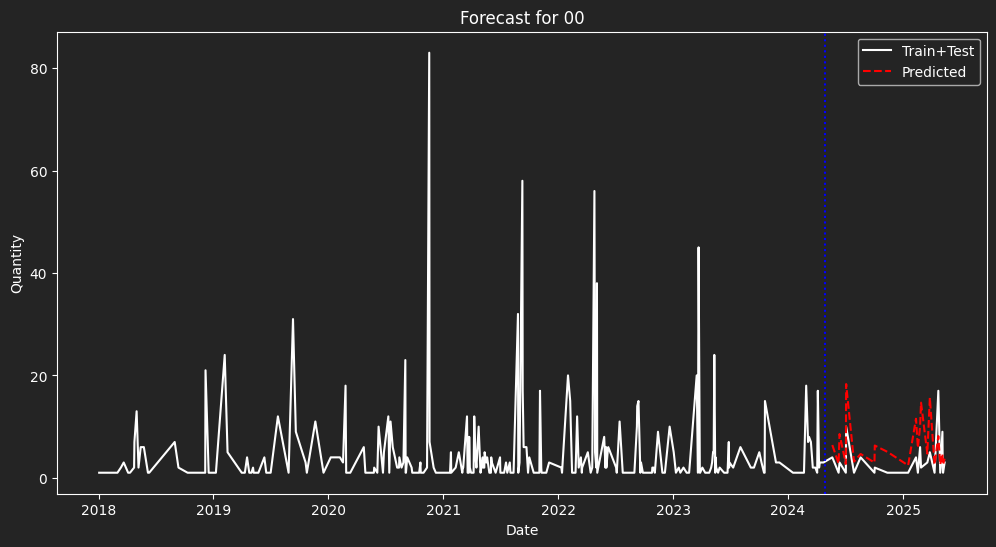

In [8]:
plot_method3(train_df, test_df, cutoff_date)